# Welcome to team Klima Kämpfer's notebook for the WiDS datathon 2022

## What data are we exploring here? 

### The data in this notebook looks at energy efficiency of buildings in the United States. The goal is to find the best predictors of energy efficienct, that is those predictors that are most correlated with the outcome variable and give us the strongest model in terms of predicting the outcome variable. The dataset can be downloaded [here](https://www.kaggle.com/c/widsdatathon2022/data) 

## 1. Data cleaning and preparation

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)  

In [2]:
#loading the data
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
#display the top 5 rows for train
train.head(5) 

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
#display the last 5 rows for train
train.tail(5) 

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755
75756,6,State_11,Residential,2to4_Unit_Building,23888.0,1974.0,51.0,36.6,27,36.935484,51,29,42.172414,60,30,41.403226,66,36,51.533333,85,41,53.887097,80,41,58.433333,90,48,60.532258,83,49,64.338710,90,43,55.931034,75,40,48.532258,60,31,45.150000,69,18,30.919355,42,148,5853,107.69,28.8,377,49.127397,17,1,0,0,16,0,0,0,NaN,NaN,NaN,NaN,29.154684,75756


### Cleaning train set (steps need to be repeated for test set)

In [5]:
#check how many rows and colums we have
print('Train set rows:',train.shape[0])
print('Train set columns:',train.shape[1])

Train set rows: 75757
Train set columns: 64


In [6]:
#checking the types of data
train.dtypes

Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
year_built                   float64
energy_star_rating           float64
ELEVATION                    float64
january_min_temp               int64
january_avg_temp             float64
january_max_temp               int64
february_min_temp              int64
february_avg_temp            float64
february_max_temp              int64
march_min_temp                 int64
march_avg_temp               float64
march_max_temp                 int64
april_min_temp                 int64
april_avg_temp               float64
april_max_temp                 int64
may_min_temp                   int64
may_avg_temp                 float64
may_max_temp                   int64
june_min_temp                  int64
june_avg_temp                float64
june_max_temp                  int64
july_min_temp                  int64
j

In [7]:
#[Chris edit] checking string values and counts for State_Factor, building_class, facility_type
print(train['State_Factor'].groupby(train['State_Factor']).count())
print('')
print(train['building_class'].groupby(train['building_class']).count())
print('')
print(train['facility_type'].groupby(train['facility_type']).count())

State_Factor
State_1      5618
State_10       15
State_11     6412
State_2      4871
State_4      4300
State_6     50840
State_8      3701
Name: State_Factor, dtype: int64

building_class
Commercial     32199
Residential    43558
Name: building_class, dtype: int64

facility_type
2to4_Unit_Building                            1893
5plus_Unit_Building                           1273
Commercial_Other                              1744
Commercial_Unknown                              95
Data_Center                                     27
Education_College_or_university               1056
Education_Other_classroom                     3860
Education_Preschool_or_daycare                 108
Education_Uncategorized                        709
Food_Sales                                      70
Food_Service_Other                              17
Food_Service_Restaurant_or_cafeteria            64
Food_Service_Uncategorized                      18
Grocery_store_or_food_market                   448
Health

In [8]:
#Visualizing facility_type string values
u = train.facility_type.unique()
print(sorted(u))

['2to4_Unit_Building', '5plus_Unit_Building', 'Commercial_Other', 'Commercial_Unknown', 'Data_Center', 'Education_College_or_university', 'Education_Other_classroom', 'Education_Preschool_or_daycare', 'Education_Uncategorized', 'Food_Sales', 'Food_Service_Other', 'Food_Service_Restaurant_or_cafeteria', 'Food_Service_Uncategorized', 'Grocery_store_or_food_market', 'Health_Care_Inpatient', 'Health_Care_Outpatient_Clinic', 'Health_Care_Outpatient_Uncategorized', 'Health_Care_Uncategorized', 'Industrial', 'Laboratory', 'Lodging_Dormitory_or_fraternity_sorority', 'Lodging_Hotel', 'Lodging_Other', 'Lodging_Uncategorized', 'Mixed_Use_Commercial_and_Residential', 'Mixed_Use_Predominantly_Commercial', 'Mixed_Use_Predominantly_Residential', 'Multifamily_Uncategorized', 'Nursing_Home', 'Office_Bank_or_other_financial', 'Office_Medical_non_diagnostic', 'Office_Mixed_use', 'Office_Uncategorized', 'Parking_Garage', 'Public_Assembly_Drama_theater', 'Public_Assembly_Entertainment_culture', 'Public_Ass

### Object/string type variables need to be encoded to integer types

In [9]:
#[Kris edit] encode and bin string variables
train['building_class_binary'] = train['building_class']
train['facility_type_binned'] = train['facility_type']

train.loc[train['building_class'] == 'Commercial', 'building_class_binary'] = 0
train.loc[train['building_class'] == 'Residential', 'building_class_binary'] = 1

value_dict = {'5plus_Unit_Building': 1, 'Commercial_Other': 2, 'Data_Center': 3,
              'Education_College_or_university': 4, 'Education_Other_classroom': 5, 'Food_Sales': 6,
              'Grocery_store_or_food_market': 7, 'Health_Care_Inpatient': 8, 'Health_Care_Outpatient_Clinic': 9, 
              'Health_Care_Outpatient_Uncategorized': 10, 'Industrial': 11, 'Lodging_Dormitory_or_fraternity_sorority': 12,
              'Lodging_Hotel': 13, 'Mixed_Use_Commercial_and_Residential': 14, 'Multifamily_Uncategorized': 15, 
              'Nursing_Home': 16, 'Office_Bank_or_other_financial': 17, 'Office_Medical_non_diagnostic': 18, 
              'Office_Mixed_use': 19, 'Office_Uncategorized': 20, 'Public_Safety_Courthouse': 21,
              'Parking_Garage': 22, 'Retail_Enclosed_mall': 23, 'Retail_Uncategorized': 24, 
              'Service_Vehicle_service_repair_shop': 25, 'Warehouse_Refrigerated': 26} 
              
#'2to4_Unit_Building': 0, 'Commercial_Unknown': 0,'Education_Preschool_or_daycare': 3, 'Education_Uncategorized': 3, 'Food_Service_Other': 4, 'Food_Service_Restaurant_or_cafeteria': 4, 'Food_Service_Uncategorized': 4, 'Health_Care_Uncategorized': 5, 'Laboratory': 5, 'Lodging_Other': 6, 'Lodging_Uncategorized': 6, 'Mixed_Use_Predominantly_Commercial': 6, 'Mixed_Use_Predominantly_Residential': 1, 'Public_Assembly_Drama_theater': 8, 'Public_Assembly_Entertainment_culture': 8, 'Public_Assembly_Library': 8,'Public_Assembly_Movie_Theater': 8, 'Public_Assembly_Other':8, 'Public_Assembly_Recreation': 8, 'Public_Assembly_Social_meeting': 8, 'Public_Assembly_Stadium': 8,'Public_Assembly_Uncategorized': 8, 'Public_Safety_Fire_or_police_station': 8, 'Public_Safety_Penitentiary': 8, 'Public_Safety_Uncategorized': 8,  'Retail_Strip_shopping_mall': 9, 'Retail_Vehicle_dealership_showroom': 9, 'Service_Drycleaning_or_Laundry': 10, 'Service_Uncategorized': 10,  'Warehouse_Distribution_or_Shipping_center': 11, 'Warehouse_Nonrefrigerated': 11,  'Warehouse_Selfstorage': 11, 'Warehouse_Uncategorized': 11, 'Religious_worship': 14}

train['facility_type_binned'] = train['facility_type_binned'].replace(value_dict)

In [11]:
#define values
values = ['2to4_Unit_Building', 'Commercial_Unknown','Education_Preschool_or_daycare', 
          'Education_Uncategorized', 'Food_Service_Other', 'Food_Service_Restaurant_or_cafeteria', 
          'Food_Service_Uncategorized', 'Health_Care_Uncategorized', 'Laboratory', 'Lodging_Other', 
          'Lodging_Uncategorized', 'Mixed_Use_Predominantly_Commercial', 'Mixed_Use_Predominantly_Residential', 
          'Public_Assembly_Drama_theater', 'Public_Assembly_Entertainment_culture', 'Public_Assembly_Library',
          'Public_Assembly_Movie_Theater', 'Public_Assembly_Other', 'Public_Assembly_Recreation', 
          'Public_Assembly_Social_meeting', 'Public_Assembly_Stadium','Public_Assembly_Uncategorized', 
          'Public_Safety_Fire_or_police_station', 'Public_Safety_Penitentiary', 'Public_Safety_Uncategorized', 
          'Retail_Strip_shopping_mall', 'Retail_Vehicle_dealership_showroom', 'Service_Drycleaning_or_Laundry', 
          'Service_Uncategorized',  'Warehouse_Distribution_or_Shipping_center', 'Warehouse_Nonrefrigerated',  
          'Warehouse_Selfstorage', 'Warehouse_Uncategorized', 'Religious_worship']

#drop rows that contain any value in the list
train = train[train.facility_type_binned.isin(values) == False]

In [13]:
train['facility_type_binned'] = train['facility_type_binned'].astype(int)
train.facility_type_binned.unique()

array([ 7, 23,  5, 20,  3,  2, 18,  4, 11, 24, 13,  8, 14, 17, 22, 25, 26,
        6, 16,  9,  1, 15, 12, 19, 10, 21])

In [14]:
#[Kris edit] check correlations with target variable
#Perfect: If the value is near ± 1,
#High degree: If the coefficient value lies between ± 0.50 and ± 1
#Low degree: When the value lies below + .29

corr = train[train.columns[1:]].corr()['site_eui'][:]
corr

floor_area                   0.051675
year_built                   0.031570
energy_star_rating          -0.521747
ELEVATION                    0.013817
january_min_temp            -0.123035
january_avg_temp            -0.116517
january_max_temp            -0.066590
february_min_temp           -0.086237
february_avg_temp           -0.104490
february_max_temp           -0.080085
march_min_temp              -0.093667
march_avg_temp              -0.105067
march_max_temp              -0.061056
april_min_temp              -0.064405
april_avg_temp              -0.086907
april_max_temp              -0.064517
may_min_temp                 0.000704
may_avg_temp                 0.044662
may_max_temp                -0.001307
june_min_temp                0.028027
june_avg_temp                0.075118
june_max_temp               -0.025463
july_min_temp                0.072567
july_avg_temp                0.089735
july_max_temp                0.031525
august_min_temp              0.048608
august_avg_t

### Due to low correlation with our output variable (site_eui) across the entire set, we have decided to drop all columns with less than (+-0.10) correlation.

In [123]:
#train.drop(columns=['floor_area','year_built', 'ELEVATION', 'january_max_temp', 'march_max_temp',
#                    'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp',
#                    'june_min_temp', 'june_max_temp', 'july_max_temp', 'august_min_temp',
#                    'august_max_temp', 'september_min_temp', 'september_max_temp',
#                    'october_min_temp', 'october_avg_temp', 'october_max_temp',
#                    'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 
#                    'december_max_temp', 'avg_temp', 'days_below_10F', 'days_below_0F', 'days_above_80F',
#                    'days_above_90F', 'days_above_100F', 'days_above_110F',
#                    'direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog',
#                   'facility_type_binned'], inplace=True) 
#Check that columns were dropped
#print('Train set columns:',train.shape[1])

In [15]:
#find columns containing null values

print(train.isnull().sum())

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
year_built                     995
energy_star_rating           22782
ELEVATION                        0
january_min_temp                 0
january_avg_temp                 0
january_max_temp                 0
february_min_temp                0
february_avg_temp                0
february_max_temp                0
march_min_temp                   0
march_avg_temp                   0
march_max_temp                   0
april_min_temp                   0
april_avg_temp                   0
april_max_temp                   0
may_min_temp                     0
may_avg_temp                     0
may_max_temp                     0
june_min_temp                    0
june_avg_temp                    0
june_max_temp                    0
july_min_temp                    0
july_avg_temp                    0
july_max_temp       

In [16]:
#drop string columns
train.drop(columns=['Year_Factor', 'State_Factor', 'building_class'], inplace=True) 

In [17]:
# fill missing values with mean column values

train.fillna(train.mean(), inplace=True)

/Users/kristinpredeck/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
#check columns containing null values got filled with values

print(train.isnull().sum())

facility_type                0
floor_area                   0
year_built                   0
energy_star_rating           0
ELEVATION                    0
january_min_temp             0
january_avg_temp             0
january_max_temp             0
february_min_temp            0
february_avg_temp            0
february_max_temp            0
march_min_temp               0
march_avg_temp               0
march_max_temp               0
april_min_temp               0
april_avg_temp               0
april_max_temp               0
may_min_temp                 0
may_avg_temp                 0
may_max_temp                 0
june_min_temp                0
june_avg_temp                0
june_max_temp                0
july_min_temp                0
july_avg_temp                0
july_max_temp                0
august_min_temp              0
august_avg_temp              0
august_max_temp              0
september_min_temp           0
september_avg_temp           0
september_max_temp           0
october_

In [128]:
# energy_star_rating is our most correlated variable with site_eui, too risky to try and estimate null values, need to drop

#train = train.dropna()    
#train.count()

In [129]:
#[Chris edit] rechecking count of categorical variables after dropping obervations with null values
#print(train['State_Factor'].groupby(train['State_Factor']).count())
#print('')
#print(train['building_class'].groupby(train['building_class']).count())
#print('')
#print(train['facility_type'].groupby(train['facility_type']).count())

In [130]:
#find duplicate rows; a huge data set as in this case can often have some duplicate data 
#which might be disturbing

#duplicate_rows_df = train[train.duplicated()]
#print("number of duplicate rows: ", duplicate_rows_df.shape[0])

In [131]:
#drop duplicate rows

#train = train.drop_duplicates()

In [132]:
#Checking shape of dataframe after dropping columns, null values, and duplicates
#print('Train set rows:',train.shape[0])
#print('Train set columns:',train.shape[1])

In [133]:
#Reviewing the columns still in the dataframe
#print(train.columns)

In [19]:
#detect outliers, outliers are one of the primary reasons for resulting in a less accurate model
#it's a good idea to remove them

Q1 = train.iloc[0:49048,0:27].quantile(0.25) # first quartile (25%)
Q3 = train.iloc[0:49048,0:27].quantile(0.75) # third quartile (75%)
IQR = Q3 - Q1 # Interquartile range (IQR)
print(IQR)

floor_area            117504.000000
year_built                45.000000
energy_star_rating        16.000000
ELEVATION                 30.800000
january_min_temp           9.000000
january_avg_temp           8.725806
january_max_temp           6.000000
february_min_temp         15.000000
february_avg_temp         11.017196
february_max_temp          7.000000
march_min_temp            14.000000
march_avg_temp            11.596774
march_max_temp            15.000000
april_min_temp             4.000000
april_avg_temp             2.433333
april_max_temp             8.000000
may_min_temp               7.000000
may_avg_temp               2.306452
may_max_temp               2.000000
june_min_temp              5.000000
june_avg_temp              1.666667
june_max_temp              4.000000
july_min_temp              3.000000
july_avg_temp              2.645161
july_max_temp              6.000000
august_min_temp            2.000000
dtype: float64


In [20]:
#remove outliers, wow look at how many rows got removed!

train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

/Users/kristinpredeck/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until


(30886, 63)

### Cleaning testing set

In [21]:
#Reviewing top 5 rows of test set
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [22]:
#Reviewing bottom 5 rows of test set
test.tail()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
9700,7,State_11,Residential,5plus_Unit_Building,305925.0,2013.0,99.0,812.0,21,38.66129,54,28,41.625,59,33,46.5,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,0,NaN,NaN,NaN,NaN,85457
9701,7,State_11,Residential,5plus_Unit_Building,34909.0,1910.0,94.0,26.5,21,38.66129,54,28,41.625,59,33,46.5,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,0,NaN,NaN,NaN,NaN,85458
9702,7,State_11,Residential,5plus_Unit_Building,42393.0,2014.0,94.0,812.0,21,38.66129,54,28,41.625,59,33,46.5,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,0,NaN,NaN,NaN,NaN,85459
9703,7,State_11,Residential,5plus_Unit_Building,25368.0,1992.0,79.0,812.0,21,38.66129,54,28,41.625,59,33,46.5,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,0,NaN,NaN,NaN,NaN,85460
9704,7,State_11,Residential,5plus_Unit_Building,45640.0,1994.0,87.0,26.5,21,38.66129,54,28,41.625,59,33,46.5,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,0,NaN,NaN,NaN,NaN,85461


In [23]:
#Checking size of the test set
print('Test set rows:',test.shape[0])
print('Test set columns:',test.shape[1])

Test set rows: 9705
Test set columns: 63


### Object/string type variables need to be encoded to integer types

In [24]:
#[Kris edit] encode and bin string variables
test['building_class_binary'] = test['building_class']
test['facility_type_binned'] = test['facility_type']

test.loc[test['building_class'] == 'Commercial', 'building_class_binary'] = 0
test.loc[test['building_class'] == 'Residential', 'building_class_binary'] = 1

value_dict = {'5plus_Unit_Building': 1, 'Commercial_Other': 2, 'Data_Center': 3,
              'Education_College_or_university': 4, 'Education_Other_classroom': 5, 'Food_Sales': 6,
              'Grocery_store_or_food_market': 7, 'Health_Care_Inpatient': 8, 'Health_Care_Outpatient_Clinic': 9, 
              'Health_Care_Outpatient_Uncategorized': 10, 'Industrial': 11, 'Lodging_Dormitory_or_fraternity_sorority': 12,
              'Lodging_Hotel': 13, 'Mixed_Use_Commercial_and_Residential': 14, 'Multifamily_Uncategorized': 15, 
              'Nursing_Home': 16, 'Office_Bank_or_other_financial': 17, 'Office_Medical_non_diagnostic': 18, 
              'Office_Mixed_use': 19, 'Office_Uncategorized': 20, 'Public_Safety_Courthouse': 21,
              'Parking_Garage': 22, 'Retail_Enclosed_mall': 23, 'Retail_Uncategorized': 24, 
              'Service_Vehicle_service_repair_shop': 25, 'Warehouse_Refrigerated': 26} 
              
#'2to4_Unit_Building': 0, 'Commercial_Unknown': 0,'Education_Preschool_or_daycare': 3, 'Education_Uncategorized': 3, 'Food_Service_Other': 4, 'Food_Service_Restaurant_or_cafeteria': 4, 'Food_Service_Uncategorized': 4, 'Health_Care_Uncategorized': 5, 'Laboratory': 5, 'Lodging_Other': 6, 'Lodging_Uncategorized': 6, 'Mixed_Use_Predominantly_Commercial': 6, 'Mixed_Use_Predominantly_Residential': 1, 'Public_Assembly_Drama_theater': 8, 'Public_Assembly_Entertainment_culture': 8, 'Public_Assembly_Library': 8,'Public_Assembly_Movie_Theater': 8, 'Public_Assembly_Other':8, 'Public_Assembly_Recreation': 8, 'Public_Assembly_Social_meeting': 8, 'Public_Assembly_Stadium': 8,'Public_Assembly_Uncategorized': 8, 'Public_Safety_Fire_or_police_station': 8, 'Public_Safety_Penitentiary': 8, 'Public_Safety_Uncategorized': 8,  'Retail_Strip_shopping_mall': 9, 'Retail_Vehicle_dealership_showroom': 9, 'Service_Drycleaning_or_Laundry': 10, 'Service_Uncategorized': 10,  'Warehouse_Distribution_or_Shipping_center': 11, 'Warehouse_Nonrefrigerated': 11,  'Warehouse_Selfstorage': 11, 'Warehouse_Uncategorized': 11, 'Religious_worship': 14}

test['facility_type_binned'] = test['facility_type_binned'].replace(value_dict)

In [25]:
#define values
values = ['2to4_Unit_Building', 'Commercial_Unknown','Education_Preschool_or_daycare', 
          'Education_Uncategorized', 'Food_Service_Other', 'Food_Service_Restaurant_or_cafeteria', 
          'Food_Service_Uncategorized', 'Health_Care_Uncategorized', 'Laboratory', 'Lodging_Other', 
          'Lodging_Uncategorized', 'Mixed_Use_Predominantly_Commercial', 'Mixed_Use_Predominantly_Residential', 
          'Public_Assembly_Drama_theater', 'Public_Assembly_Entertainment_culture', 'Public_Assembly_Library',
          'Public_Assembly_Movie_Theater', 'Public_Assembly_Other', 'Public_Assembly_Recreation', 
          'Public_Assembly_Social_meeting', 'Public_Assembly_Stadium','Public_Assembly_Uncategorized', 
          'Public_Safety_Fire_or_police_station', 'Public_Safety_Penitentiary', 'Public_Safety_Uncategorized', 
          'Retail_Strip_shopping_mall', 'Retail_Vehicle_dealership_showroom', 'Service_Drycleaning_or_Laundry', 
          'Service_Uncategorized',  'Warehouse_Distribution_or_Shipping_center', 'Warehouse_Nonrefrigerated',  
          'Warehouse_Selfstorage', 'Warehouse_Uncategorized', 'Religious_worship']

#drop rows that contain any value in the list
test = test[test.facility_type_binned.isin(values) == False]

In [26]:
test['facility_type_binned'] = test['facility_type_binned'].astype(int)
test.facility_type_binned.unique()

array([ 7, 18, 25,  2, 23, 24,  5, 20,  6, 11, 26,  3, 17, 13, 22,  4,  8,
        9, 16, 14, 15, 19, 12, 10, 21,  1])

### Dropping the same columns as in the Train set

In [140]:
#test.drop(columns=['floor_area','year_built', 'ELEVATION', 'january_max_temp', 'march_max_temp',
#                    'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp',
#                    'june_min_temp', 'june_max_temp', 'july_max_temp', 'august_min_temp',
#                    'august_max_temp', 'september_min_temp', 'september_max_temp',
#                    'october_min_temp', 'october_avg_temp', 'october_max_temp',
#                    'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 
#                    'december_max_temp', 'avg_temp', 'days_below_10F', 'days_below_0F', 'days_above_80F',
#                    'days_above_90F', 'days_above_100F', 'days_above_110F',
#                    'direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog',
#                   'facility_type_binned'], inplace=True) 
#Check that columns were dropped
#print('Test set columns:',test.shape[1])

### The train set has 30 columns, test set has 29. We are going to be predicting the missing column of the test set (site_eui)

In [27]:
#find columns containing null values

print(test.isnull().sum())

Year_Factor                     0
State_Factor                    0
building_class                  0
facility_type                   0
floor_area                      0
year_built                     63
energy_star_rating           1495
ELEVATION                       0
january_min_temp                0
january_avg_temp                0
january_max_temp                0
february_min_temp               0
february_avg_temp               0
february_max_temp               0
march_min_temp                  0
march_avg_temp                  0
march_max_temp                  0
april_min_temp                  0
april_avg_temp                  0
april_max_temp                  0
may_min_temp                    0
may_avg_temp                    0
may_max_temp                    0
june_min_temp                   0
june_avg_temp                   0
june_max_temp                   0
july_min_temp                   0
july_avg_temp                   0
july_max_temp                   0
august_min_tem

In [142]:
#can't drop null energy_star_score values because that would remove rows from the test submission file
#need to figure out how to fill those values in the best way

#test['energy_star_rating'].describe()

In [28]:
#filling in null energy_star_rating values with the mean
#test['energy_star_rating'].fillna(test['energy_star_rating'].mean, inplace=True)

test.fillna(test.mean(), inplace=True)

/Users/kristinpredeck/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


# Dimensionality reduction with PCA

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [29]:
X = train[['facility_type_binned','floor_area','year_built','direction_max_wind_speed','days_with_fog']]
y= train['site_eui']

In [32]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [33]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

In [34]:
# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

Text(0.5, 1.0, 'Dimensionality Reduction with PCA')

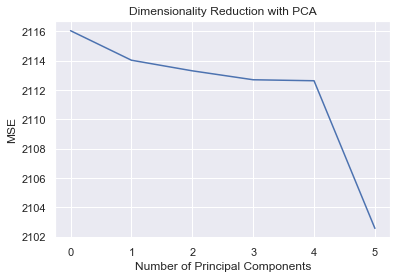

In [35]:
# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Dimensionality Reduction with PCA')

In [36]:
#calculate the percentage of variance in the response variable explained by adding in each principal component 
#after adding in the 12th component explained variance doesn't change much anymore 

np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 24.45,  46.98,  67.89,  84.21, 100.  ])

### Build the model

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [38]:
#scale X
X = StandardScaler().fit_transform(X)

In [39]:
#reduce data and compare to original shape
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (30886, 5)
transformed shape: (30886, 5)


In [40]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=0) 

In [41]:
#find best hyperparams for Ridge and Lasso
from sklearn.model_selection import GridSearchCV
from numpy import arange

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(Lasso(), grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE Lasso: %.3f' % results.best_score_)
print('Config Lasso: %s' % results.best_params_)

MAE Lasso: -24.204
Config Lasso: {'alpha': 0.9400000000000001}


In [42]:
# define search
search = GridSearchCV(Ridge(), grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE Ridge: %.3f' % results.best_score_)
print('Config Ridge: %s' % results.best_params_)

MAE Ridge: -24.230
Config Ridge: {'alpha': 0.99}


In [96]:
#make pipeline

inputone=[('scaler', StandardScaler()), ('model', DecisionTreeRegressor())]
inputtwo=[('scaler', StandardScaler()), ('model', Lasso(alpha=0.1))]
inputthree=[('scaler', StandardScaler()), ('model', Ridge(alpha=0.1))]

pipeone=Pipeline(inputone)
pipetwo=Pipeline(inputtwo)
pipethree=Pipeline(inputthree)

In [97]:
#fit models
modone = pipeone.fit(X_train,y_train)
modtwo = pipetwo.fit(X_train,y_train)
modthree = pipethree.fit(X_train,y_train)

In [98]:
#make predicted values  
y_one = modone.predict(X_test)
y_two = modtwo.predict(X_test)
y_three = modthree.predict(X_test)

In [99]:
print('R^2 Decision Tree Regressor:', modone.score(X_test, y_test))
print('MSE Decision Tree Regressor:', mean_squared_error(y_test, y_one))
print('R^2 Lasso:', modtwo.score(X_test, y_test))
print('MSE Lasso:', mean_squared_error(y_test, y_two))
print('R^2 Ridge:', modthree.score(X_test, y_test))
print('MSE Ridge:', mean_squared_error(y_test, y_three))

R^2 Decision Tree Regressor: -0.12612360000787115
MSE Decision Tree Regressor: 2316.132516413322
R^2 Lasso: 0.009950567460023096
MSE Lasso: 2036.26465473805
R^2 Ridge: 0.009813239373720917
MSE Ridge: 2036.547101572571


In [100]:
#RMSE
mseone =  mean_squared_error(y_test, y_one)
msetwo =  mean_squared_error(y_test, y_two)
msethree =  mean_squared_error(y_test, y_three)

rmseone = math.sqrt(mseone)
rmsetwo = math.sqrt(msetwo)
rmsethree = math.sqrt(msethree)

In [104]:
print('RMSE Decision Tree Regressor:', rmseone)

RMSE Decision Tree Regressor: 48.126214440919014


In [106]:
print('RMSE Lasso:', rmsetwo)

RMSE Lasso: 45.12498924917379


In [107]:
print('RMSE Ridge:', rmsethree)

RMSE Ridge: 45.12811874621599


# Run multi-linear 3rd order polynomial regression with pipe 

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [48]:
#[Kris edit] added predictors from lm in R
X = train[['facility_type_binned','floor_area','year_built','direction_max_wind_speed','days_with_fog']]
y= train['site_eui']

In [49]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # doing 80/20 train/test split

In [89]:
#List for Pipeline
Input=[('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2)), ('model', LinearRegression())]

#Input the list as an argument into the pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', LinearRegression())])

In [90]:
#Standard Scaler can only take float inputs!!! Will get a NaN/int64 error if this step is skipped
X_train = X_train.astype(float)

In [91]:
#Fitting the model
p = pipe.fit(X_train, y_train)

In [92]:
#Saving predicted values for MSE 
y_hat = p.predict(X_test)

In [93]:
#get scores
print('R^2:', p.score(X_test, y_test))
print('MSE:', mean_squared_error(y_test, y_hat))

R^2: 0.020669282238082176
MSE: 2014.2191494032456


In [94]:
#get RMSE
import math

mse =  mean_squared_error(y_test, y_hat)

rmse = math.sqrt(mse)

In [108]:
print('RMSE Poly:', rmse)

RMSE Poly: 44.880052912215305


# These are not good scores but slightly better than before

### Gonna try Ridge with GridSearchCV next

In [61]:
parameters=[{'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'normalize':[True, False]}]
grid = GridSearchCV(Ridge(), parameters, cv=5) # with 5 CV folds

In [62]:
grid.fit(X_train, y_train)
grid.best_estimator_

Ridge(alpha=0.01, normalize=True)

In [63]:
#Checking R^2
grid.best_estimator_.score(X_test, y_test)

0.009781394380137254

In [109]:
y_hat = grid.predict(X_test)

In [110]:
import math

msegrid =  mean_squared_error(y_test, y_hat)

rmsegrid = math.sqrt(msegrid)

print('RMSE GridCV:', rmsegrid)

RMSE GridCV: 45.12884441391561


### Not good either UGH